Задание:
Реализовать интерполяцию двумя методами - ближайших соседей и линейную, для изображения небольшого разрешения. Один метод на повышение разрешения, другой на понижение.

#Интерполяция методом близжайших соседей

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
import seaborn as sns
plt.style.use('seaborn-white')
sns.set_context('notebook', rc={'figure.figsize': (10, 8)}, font_scale=1.5)
import cv2
print('OpenCV version:', cv2.__version__)

<ipython-input-4-f08bdcea89f5>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


OpenCV version: 4.8.0


In [5]:
imgorig = cv2.imread('cat.jpg')
img = cv2.cvtColor(imgorig, cv2.COLOR_BGR2RGB)
print(img.shape)

(190, 330, 3)


In [6]:
interpolation_algorithm = [
    ("nearest", cv2.INTER_NEAREST),
    ("bilinear", cv2.INTER_LINEAR),
    ("bicubic", cv2.INTER_CUBIC),
    ("area", cv2.INTER_AREA),
    ("lanczos4", cv2.INTER_LANCZOS4)
]

DOWN
orig size: 190 330
resize size: 47 82


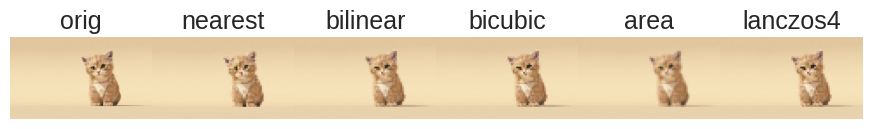

UP
orig size: 47 82
resize size: 188 328


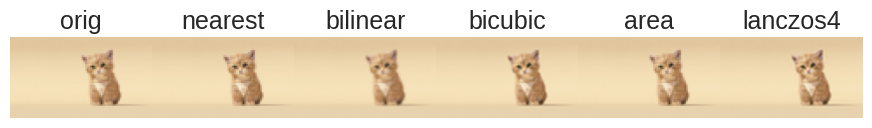

In [7]:
def resize_test(img, factor, is_plot=True, file_name=None):
    height, width, channels = img.shape
    height2, width2 = int(height*factor), int(width*factor)
    print('orig size:', height, width)
    print('resize size:', height2, width2)
    imgs = []
    for alg in interpolation_algorithm:
        img_r = cv2.resize(img, (width2, height2), interpolation = alg[1])
        imgs.append(img_r)
    if is_plot:
        plt.figure(figsize=(11, 2))
        plt.subplot(1, len(imgs)+1, 1)
        plt.title('orig')
        plt.imshow(img)
        plt.axis('off')
        for i in range( len(imgs) ):
            plt.subplot(1, len(imgs)+1, i+2)
            plt.title( interpolation_algorithm[i][0] )
            plt.imshow(imgs[i])
            plt.axis('off')
        plt.subplots_adjust(wspace=0)
        if file_name != None:
            plt.savefig(file_name)
        plt.show()
    return imgs
print('DOWN')
img_down0 = resize_test(img, 0.25, file_name='opencv_resize_down1.png')
print('UP')
img_up0 = resize_test(img_down0[3], 4, file_name='opencv_resize_up1.png')